In [2]:
#KNN classifier
import pandas as pd
import numpy as np 
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score

In [33]:
aug_final_df = pd.read_csv("C:\\Users\\cosl5\\Downloads\\aug_final_df (1).csv")
aug_final_df.head()

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,13,Ravdess\03-01-01-01-01-01-01.wav,-562.151506,31.979038,1.889848,8.659115,4.850125,-1.467678,-3.232874,-6.313390,...,0.000007,0.000005,0.000005,3.633485e-06,0.004597,0.015390,-0.033435,0.012520,-0.002898,0.007177
1,5,Ravdess\03-01-01-01-01-01-02.wav,-522.032804,30.843309,-6.888712,0.897592,-5.138569,-6.227784,-7.008630,-8.825021,...,0.000011,0.000011,0.000009,6.912152e-06,-0.021170,0.009388,0.005586,-0.013296,-0.003911,0.006994
2,13,Ravdess\03-01-01-01-01-01-03.wav,-561.167449,41.730094,-3.696491,5.630562,1.918353,-4.579504,-9.961748,-6.453885,...,0.000020,0.000028,0.000017,3.894878e-06,-0.005082,-0.004964,0.005950,0.021505,-0.008038,-0.009597
3,5,Ravdess\03-01-01-01-01-01-04.wav,-631.621801,33.719122,-7.336527,6.547586,-4.442126,-5.229694,-6.480212,-11.788281,...,0.000017,0.000012,0.000006,8.970399e-07,-0.007362,0.007175,-0.012972,0.007889,-0.013610,0.004167
4,13,Ravdess\03-01-01-01-01-01-05.wav,-532.558528,29.025310,9.827110,7.885900,3.647080,-1.234414,-3.232563,-3.385255,...,0.000011,0.000011,0.000010,9.498596e-06,0.008078,0.029084,-0.044486,0.003232,0.006687,0.003168


In [34]:
# Split your data into training and testing sets
aug_final_df_testing = aug_final_df.copy()

X_aug = aug_final_df_testing.drop(columns=['Path','Emotions'], axis=1)
y_aug = aug_final_df_testing['Emotions']

In [35]:
# Handle imbalance classes with SMOTE
smote = SMOTE(random_state=42)
X_smote_aug, y_smote_aug = smote.fit_resample(X_aug, y_aug)

# Split your data into training and testing sets
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_smote_aug, y_smote_aug, test_size=0.2, random_state=42)

In [36]:
# Feature scaling
scaler = StandardScaler()
X_train_aug = scaler.fit_transform(X_train_aug)
X_test_aug = scaler.transform(X_test_aug)

In [138]:
#Finding the best number of neighbors for KNN
k_values = range(1,10, 1)
cv_scores = []

for k in k_values:
    
    classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    
    # Perform 10-fold cross-validation
    scores = cross_val_score(classifier, X_train_aug, y_train_aug, cv=10, scoring='accuracy')
    
    # Store the mean score
    cv_scores.append(scores.mean())

best_k_aug = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

print(f'Optimal k: {best_k_aug} with Cross-Validation Accuracy: {best_score:.4f}')

Optimal k: 1 with Cross-Validation Accuracy: 0.6945


In [209]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

k_values = range(1, 10)
cv_scores = []

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='manhattan
    
    ')
    # Perform 10-fold cross-validation
    scores = cross_val_score(classifier, X_train_aug, y_train_aug, cv=15, scoring='accuracy')
    # Store the mean score
    cv_scores.append(scores.mean())

# Find the optimal k
best_k_aug = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

print(f'Optimal k: {best_k_aug} with Cross-Validation Accuracy: {best_score:.4f}')

# To get training accuracy for the optimal k, retrain the model and evaluate it on the training set
classifier_optimal = KNeighborsClassifier(n_neighbors=best_k_aug, metric='manhattan')
classifier_optimal.fit(X_train_aug, y_train_aug)
training_accuracy = classifier_optimal.score(X_train_aug, y_train_aug)

print(f'Training Accuracy for Optimal k: {training_accuracy:.4f}')

Optimal k: 1 with Cross-Validation Accuracy: 0.7108
Training Accuracy for Optimal k: 1.0000


In [120]:
#Define the final model (Distance metric = manhattan)
classifier_aug_m = KNeighborsClassifier(n_neighbors=best_k_aug, metric='manhattan')

#Fit model
classifier_aug_m.fit(X_train_aug, y_train_aug)

y_pred_aug_m = classifier_aug_m.predict(X_test_aug)

In [152]:
#Define the final model (Distance metric = euclidean)
classifier_aug_e = KNeighborsClassifier(n_neighbors=best_k_aug, metric='euclidean')

#Fit model
classifier_aug_e.fit(X_train_aug, y_train_aug)

y_pred_aug_e = classifier_aug_e.predict(X_test_aug)

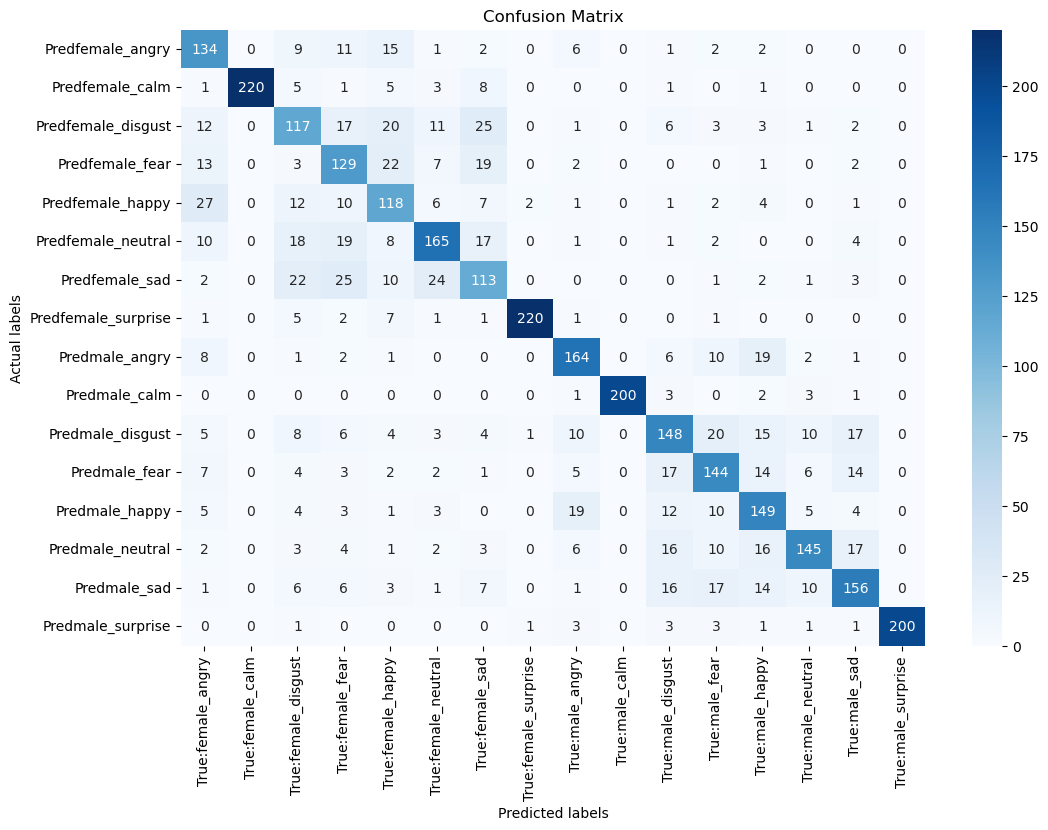

In [122]:
#confusion matrix for based on euclidean distance
confusion_aug = confusion_matrix(y_test_aug, y_pred_aug_e)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

# Create a pandas DataFrame as you did, which is optional but useful for labeling.
confusion_aug_df = pd.DataFrame(confusion_aug.T, 
                            index=['Pred' + str(label) for label in class_labels], 
                            columns=['True:' + str(label) for label in class_labels])

# Use Seaborn to create a heatmap from the DataFrame
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(confusion_aug_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()


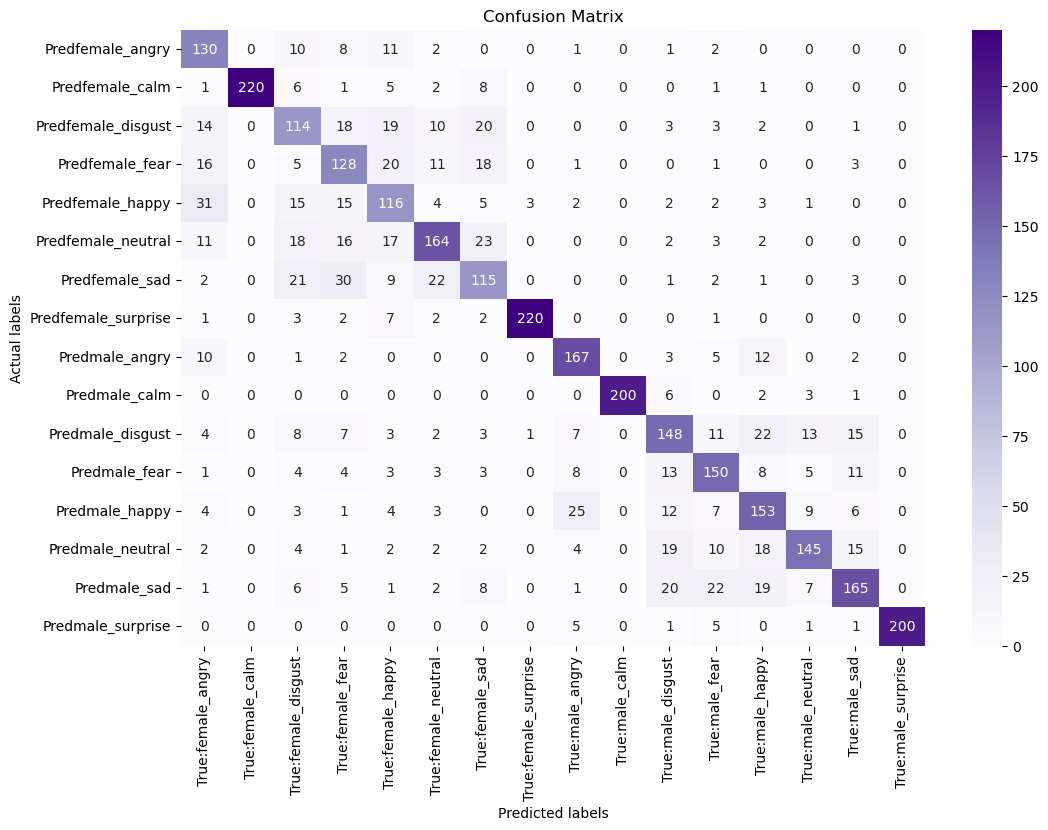

In [123]:
#confusion matrix for based on manhattan distance
confusion_aug = confusion_matrix(y_test_aug, y_pred_aug_m)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

# Create a pandas DataFrame as you did, which is optional but useful for labeling.
confusion_aug_df = pd.DataFrame(confusion_aug.T, 
                            index=['Pred' + str(label) for label in class_labels], 
                            columns=['True:' + str(label) for label in class_labels])

# Use Seaborn to create a heatmap from the DataFrame
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(confusion_aug_df, annot=True, fmt='d', cmap='Purples')

plt.title('Confusion Matrix')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [124]:
#f1-score for euclidean distance
f1_aug_features_e = f1_score(y_test_aug, y_pred_aug_e, average = 'weighted')
print(f"\nf1_score:\n{f1_aug_features_e}")


f1_score:
0.7151949386797266


In [125]:
#f1-score for manhattan distance
f1_aug_features_m = f1_score(y_test_aug, y_pred_aug_m, average = 'weighted')
print(f"\nf1_score:\n{f1_aug_features_m}")


f1_score:
0.718984749941234


In [126]:
#f1-score for euclidean distance
f1_aug_features_e = f1_score(y_test_aug, y_pred_aug_e, average = None)
print(f"\nf1_score:\n{f1_aug_features_e}")


f1_score:
[0.65206813 0.94623656 0.53669725 0.59174312 0.57843137 0.69620253
 0.55121951 0.95032397 0.75402299 0.97560976 0.61410788 0.64864865
 0.65065502 0.70904645 0.67678959 0.96618357]


In [127]:
#f1-score for manhattan distance
f1_aug_features_m = f1_score(y_test_aug, y_pred_aug_m, average = None)
print(f"\nf1_score:\n{f1_aug_features_m}")


f1_score:
[0.66157761 0.94623656 0.54028436 0.58049887 0.55769231 0.67628866
 0.55690073 0.95238095 0.78959811 0.97087379 0.62315789 0.68493151
 0.65106383 0.71078431 0.6875     0.968523  ]


In [153]:
#accuracy for euclidean distance
accuracy_aug_e = accuracy_score(y_test_aug, y_pred_aug_e)
print(f"\nAccuracy:\n{accuracy_aug_e}")


Accuracy:
0.7189281641961232


In [129]:
#accuracy for manhattan distance
accuracy_aug_m = accuracy_score(y_test_aug, y_pred_aug_m)
print(f"\nAccuracy:\n{accuracy_aug_m}")


Accuracy:
0.7226339794754846


In [130]:
#report for euclidean distance
report_aug_e = classification_report(y_test_aug, y_pred_aug_e)
print(f"\nReport:\n{report_aug_e}")


Report:
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       228
           1       0.90      1.00      0.95       220
           2       0.54      0.54      0.54       218
           3       0.65      0.54      0.59       238
           4       0.62      0.54      0.58       217
           5       0.67      0.72      0.70       229
           6       0.56      0.55      0.55       207
           7       0.92      0.98      0.95       224
           8       0.77      0.74      0.75       221
           9       0.95      1.00      0.98       200
          10       0.59      0.64      0.61       231
          11       0.66      0.64      0.65       225
          12       0.69      0.61      0.65       243
          13       0.64      0.79      0.71       184
          14       0.66      0.70      0.68       223
          15       0.93      1.00      0.97       200

    accuracy                           0.72      3508
   macro avg     

In [131]:
#report for manhattan distance
report_aug_m = classification_report(y_test_aug, y_pred_aug_m)
print(f"\nReport:\n{report_aug_m}")


Report:
              precision    recall  f1-score   support

           0       0.79      0.57      0.66       228
           1       0.90      1.00      0.95       220
           2       0.56      0.52      0.54       218
           3       0.63      0.54      0.58       238
           4       0.58      0.53      0.56       217
           5       0.64      0.72      0.68       229
           6       0.56      0.56      0.56       207
           7       0.92      0.98      0.95       224
           8       0.83      0.76      0.79       221
           9       0.94      1.00      0.97       200
          10       0.61      0.64      0.62       231
          11       0.70      0.67      0.68       225
          12       0.67      0.63      0.65       243
          13       0.65      0.79      0.71       184
          14       0.64      0.74      0.69       223
          15       0.94      1.00      0.97       200

    accuracy                           0.72      3508
   macro avg     

In [132]:
#precision for euclidean distance
precision_aug_features_e = precision_score(y_test_aug, y_pred_aug_e, average=None)
print(f"\nPrecision:\n{precision_aug_features_e}")


Precision:
[0.73224044 0.89795918 0.53669725 0.65151515 0.61780105 0.67346939
 0.55665025 0.92050209 0.76635514 0.95238095 0.58964143 0.65753425
 0.69302326 0.64444444 0.65546218 0.93457944]


In [133]:
#precision for manhattan distance
precision_aug_features_m = precision_score(y_test_aug, y_pred_aug_m, average=None)
print(f"\nPrecision:\n{precision_aug_features_m}")


Precision:
[0.78787879 0.89795918 0.55882353 0.63054187 0.58291457 0.640625
 0.55825243 0.92436975 0.82673267 0.94339623 0.60655738 0.70422535
 0.67400881 0.64732143 0.64202335 0.93896714]


In [85]:
merged_final_df = pd.read_csv("C:\\Users\\cosl5\\Downloads\\merged_df.csv")
merged_final_df.head()

,Unnamed: 0,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,2581,8,Crema\1015_IEO_ANG_HI.wav,-274.081064,90.553742,-1.319409,28.355147,-3.295721,4.588043,-4.467366,...,0.000086,0.000085,0.000080,0.000078,-0.016402,-0.013311,-0.054505,0.011296,0.012550,0.009563
1,6466,12,Crema\1062_IWL_HAP_XX.wav,-282.730691,71.540738,34.301680,11.759998,2.890566,-2.018548,-3.562313,...,0.000976,0.000892,0.000916,0.000897,0.041275,0.032079,0.008832,-0.025359,0.013441,0.032247
2,3673,5,Crema\1028_ITS_NEU_XX.wav,-391.468786,86.299907,44.825176,37.441880,12.426751,7.889423,0.606896,...,0.000043,0.000041,0.000043,0.000041,-0.005835,0.003289,-0.048369,-0.063204,0.011831,0.009074
3,21239,4,Tess\OAF_happy\OAF_kick_happy.wav,-471.930760,63.462643,13.026071,7.454551,7.756898,-2.243907,-15.625067,...,0.000437,0.000529,0.000278,0.000023,-0.005725,0.030310,-0.053869,-0.018939,-0.024129,-0.016006
4,8315,8,Crema\1085_IEO_ANG_LO.wav,-325.833235,65.936750,17.097764,19.950584,-0.243021,13.107857,4.477988,...,0.000144,0.000141,0.000145,0.000145,-0.008370,-0.026442,-0.042298,0.055370,-0.000482,0.018563


In [86]:
# Split your data into training and testing sets
merged_final_df_testing = merged_final_df.copy()

X_merged = merged_final_df_testing.drop(columns=['Unnamed: 0','Path','Emotions'], axis=1)
y_merged = merged_final_df_testing['Emotions']

In [87]:
# Handle imbalance classes with SMOTE
smote = SMOTE(random_state=42)
X_smote_merged, y_smote_merged = smote.fit_resample(X_merged, y_merged)

# Split your data into training and testing sets
X_train_merged, X_test_merged, y_train_merged, y_test_merged = train_test_split(X_smote_merged, y_smote_merged, test_size=0.2, random_state=42)

In [88]:
# Feature scaling
scaler = StandardScaler()
X_train_merged = scaler.fit_transform(X_train_merged)
X_test_merged = scaler.transform(X_test_merged)

In [56]:
#Finding the best number of neighbors for KNN (euclidean)
k_values = range(1,10, 1)
cv_scores = []

for k in k_values:
    
    classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    
    # Perform 10-fold cross-validation
    scores = cross_val_score(classifier, X_train_merged, y_train_merged, cv=10, scoring='accuracy')
    
    # Store the mean score
    cv_scores.append(scores.mean())

best_k_merged = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

print(f'Optimal k: {best_k_merged} with Cross-Validation Accuracy: {best_score:.4f}')

Optimal k: 1 with Cross-Validation Accuracy: 0.7332


In [136]:
#Finding the best number of neighbors for KNN (manhattan)
k_values = range(1,10, 1)
cv_scores = []

for k in k_values:
    
    classifier = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    
    # Perform 10-fold cross-validation
    scores = cross_val_score(classifier, X_train_merged, y_train_merged, cv=10, scoring='accuracy')
    
    # Store the mean score
    cv_scores.append(scores.mean())

best_k_merged = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

print(f'Optimal k: {best_k_merged} with Cross-Validation Accuracy: {best_score:.4f}')

Optimal k: 1 with Cross-Validation Accuracy: 0.7465


In [206]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Assuming X_train_merged and y_train_merged are defined
k_values = range(1, 10)
cv_scores = []

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    # Perform 10-fold cross-validation
    scores = cross_val_score(classifier, X_train_merged, y_train_merged, cv=15, scoring='accuracy')
    # Store the mean score
    cv_scores.append(scores.mean())

# Find the optimal k
best_k_merged = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

print(f'Optimal k: {best_k_merged} with Cross-Validation Accuracy: {best_score:.4f}')

# To get training accuracy for the optimal k, retrain the model and evaluate it on the training set
classifier_optimal = KNeighborsClassifier(n_neighbors=best_k_merged, metric='manhattan')
classifier_optimal.fit(X_train_merged, y_train_merged)
training_accuracy = classifier_optimal.score(X_train_merged, y_train_merged)

print(f'Training Accuracy for Optimal k: {training_accuracy:.4f}')


Optimal k: 1 with Cross-Validation Accuracy: 0.7510
Training Accuracy for Optimal k: 0.9999


In [100]:
#Define the final model (Distance metric = manhattan)
classifier_merged_m = KNeighborsClassifier(n_neighbors=best_k_merged, metric='manhattan')

#Fit model
classifier_merged_m.fit(X_train_merged, y_train_merged)

y_pred_merged_m = classifier_merged_m.predict(X_test_merged)

In [101]:
#Define the final model (Distance metric = euclidean)
classifier_merged_e = KNeighborsClassifier(n_neighbors=best_k_merged, metric='euclidean')

#Fit model
classifier_merged_e.fit(X_train_merged, y_train_merged)

y_pred_merged_e = classifier_merged_e.predict(X_test_merged)

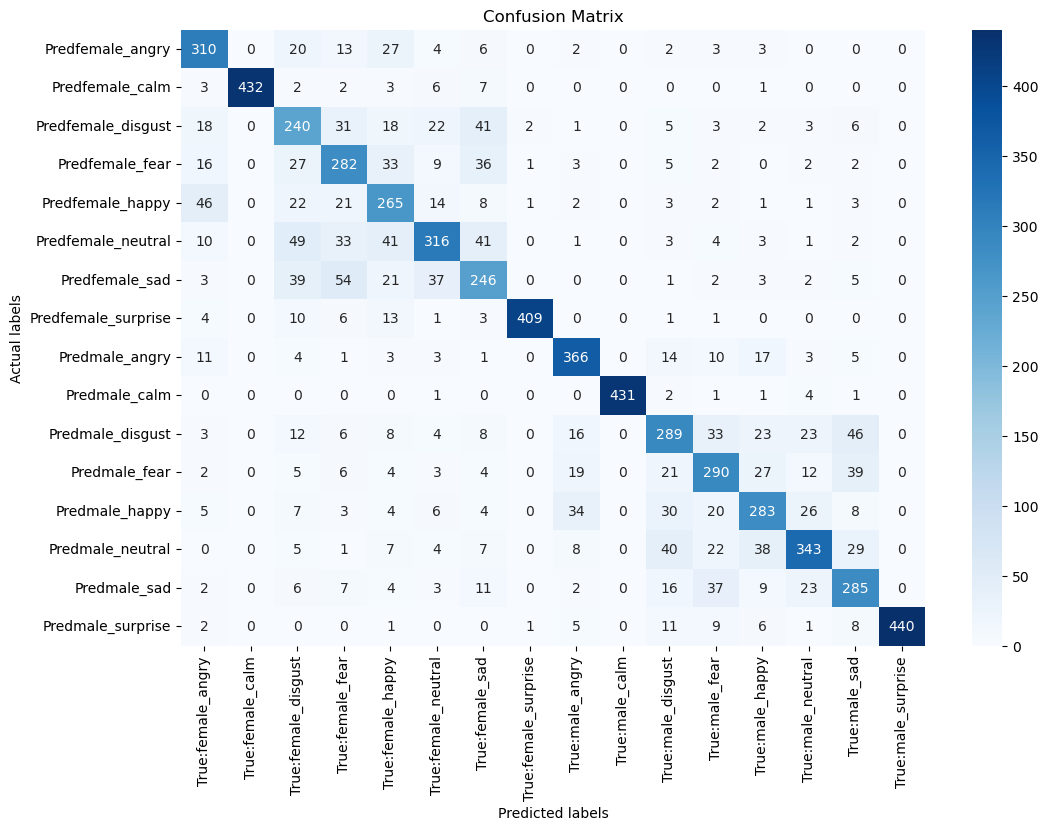

In [102]:
#confusion matrix for based on euclidean distance
confusion_merged = confusion_matrix(y_test_merged, y_pred_merged_e)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

# Create a pandas DataFrame as you did, which is optional but useful for labeling.
confusion_merged_df = pd.DataFrame(confusion_merged.T, 
                            index=['Pred' + str(label) for label in class_labels], 
                            columns=['True:' + str(label) for label in class_labels])

# Use Seaborn to create a heatmap from the DataFrame
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(confusion_merged_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()


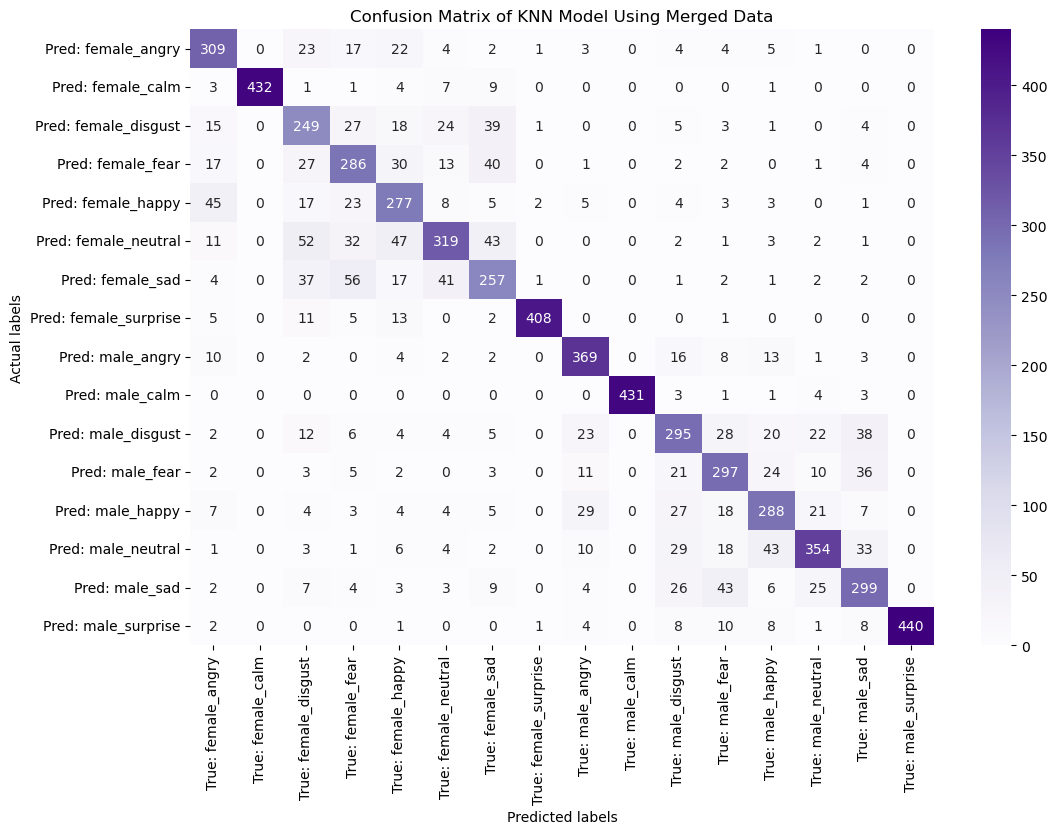

In [199]:
#confusion matrix for based on manhattan distance
confusion_merged = confusion_matrix(y_test_merged, y_pred_merged_m)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

# Create a pandas DataFrame as you did, which is optional but useful for labeling.
confusion_merged_df = pd.DataFrame(confusion_merged.T, 
                            index=['Pred: ' + str(label) for label in class_labels], 
                            columns=['True: ' + str(label) for label in class_labels])

# Use Seaborn to create a heatmap from the DataFrame
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(confusion_merged_df, annot=True, fmt='d', cmap='Purples')

plt.title('Confusion Matrix of KNN Model Using Merged Data')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [107]:
#f1_score based on euclidean distance
f1_merged_features_e = f1_score(y_test_merged, y_pred_merged_e, average = 'weighted')
print(f"\nf1_score:\n{f1_merged_features_e}")


f1_score:
0.74238663274967


In [189]:
#f1_score based on manhattan distance
f1_merged_features_m = f1_score(y_test_merged, y_pred_merged_m, average = 'weighted')
print(f"\nf1_score:\n{f1_merged_features_m}")


f1_score:
0.7544264986997219


In [110]:
#f1_score based on euclidean distance
f1_merged_features_e = f1_score(y_test_merged, y_pred_merged_e, average = None)
print(f"\nf1_score:\n{f1_merged_features_e}")


f1_score:
[0.75151515 0.97297297 0.57142857 0.63800905 0.63020214 0.67449306
 0.58851675 0.94895592 0.81605351 0.98853211 0.63238512 0.66590126
 0.66824085 0.72362869 0.67535545 0.95238095]


In [111]:
#f1_score based on manhattan distance
f1_merged_features_m = f1_score(y_test_merged, y_pred_merged_m, average = None)
print(f"\nf1_score:\n{f1_merged_features_m}")


f1_score:
[0.74457831 0.97078652 0.5971223  0.64341957 0.6556213  0.6744186
 0.60900474 0.94994179 0.83014623 0.98627002 0.654102   0.69636577
 0.69064748 0.74683544 0.68735632 0.95341278]


In [156]:
#accuracy based on euclidean distance
accuracy_merged_e = accuracy_score(y_test_merged, y_pred_merged_e)
print(f"\nAccuracy:\n{accuracy_merged_e}")


Accuracy:
0.7451176051318603


In [223]:
#accuracy based on manhattan distance
accuracy_merged_m = accuracy_score(y_test_merged, y_pred_merged_m)
print(f"\nAccuracy:\n{accuracy_merged_m}")


Accuracy:
0.7569493941553813


In [115]:
#report based on euclidean distance

report_merged_e = classification_report(y_test_merged, y_pred_merged_e)
print(f"\nReport:\n{report_merged_e}")


Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       435
           1       0.95      1.00      0.97       432
           2       0.61      0.54      0.57       448
           3       0.67      0.61      0.64       466
           4       0.68      0.59      0.63       452
           5       0.63      0.73      0.67       433
           6       0.60      0.58      0.59       423
           7       0.91      0.99      0.95       414
           8       0.84      0.80      0.82       459
           9       0.98      1.00      0.99       431
          10       0.61      0.65      0.63       443
          11       0.67      0.66      0.67       439
          12       0.66      0.68      0.67       417
          13       0.68      0.77      0.72       444
          14       0.70      0.65      0.68       439
          15       0.91      1.00      0.95       440

    accuracy                           0.75      7015
   macro avg     

In [212]:
#report based on manhattan distance
class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]
report_merged_m = classification_report(y_test_merged, y_pred_merged_m, target_names=class_labels)
print(f"\nClassification report on merged dataset for KNN model :\n{report_merged_m}")


Classification report on merged dataset for KNN model :
                 precision    recall  f1-score   support

   female_angry       0.78      0.71      0.74       435
    female_calm       0.94      1.00      0.97       432
 female_disgust       0.65      0.56      0.60       448
    female_fear       0.68      0.61      0.64       466
   female_happy       0.70      0.61      0.66       452
 female_neutral       0.62      0.74      0.67       433
     female_sad       0.61      0.61      0.61       423
female_surprise       0.92      0.99      0.95       414
     male_angry       0.86      0.80      0.83       459
      male_calm       0.97      1.00      0.99       431
   male_disgust       0.64      0.67      0.65       443
      male_fear       0.72      0.68      0.70       439
     male_happy       0.69      0.69      0.69       417
   male_neutral       0.70      0.80      0.75       444
       male_sad       0.69      0.68      0.69       439
  male_surprise       0.91    

In [118]:
#precision based on euclidean distance
precision_merged_features_e = precision_score(y_test_merged, y_pred_merged_e, average=None)
print(f"\nPrecision:\n{precision_merged_features_e}")


Precision:
[0.79487179 0.94736842 0.6122449  0.67464115 0.68123393 0.62698413
 0.59564165 0.91294643 0.83561644 0.97732426 0.61358811 0.6712963
 0.65813953 0.68055556 0.7037037  0.90909091]


In [218]:
#precision based on manhattan distance
precision_merged_features_m = precision_score(y_test_merged, y_pred_merged_m, average=None)
print(f"\nPrecision:\n{precision_merged_features_m}")


Precision:
[0.78227848 0.94323144 0.64507772 0.67612293 0.70483461 0.62183236
 0.61045131 0.91685393 0.85813953 0.97291196 0.64270153 0.7173913
 0.69064748 0.70238095 0.6937355  0.91097308]


In [217]:
#precision based on manhattan distance
precision_merged_features_m = precision_score(y_test_merged, y_pred_merged_m, average= 'weighted')
print(f"\nPrecision:\n{precision_merged_features_m}")


Precision:
0.7548923956618351


In [222]:
#recall based on manhattan distance
from sklearn.metrics import recall_score

recall_merged_features_m = recall_score(y_test_merged, y_pred_merged_m, average= 'weighted')
print(f"\nRecall:\n{recall_merged_features_m}")


Recall:
0.7569493941553813


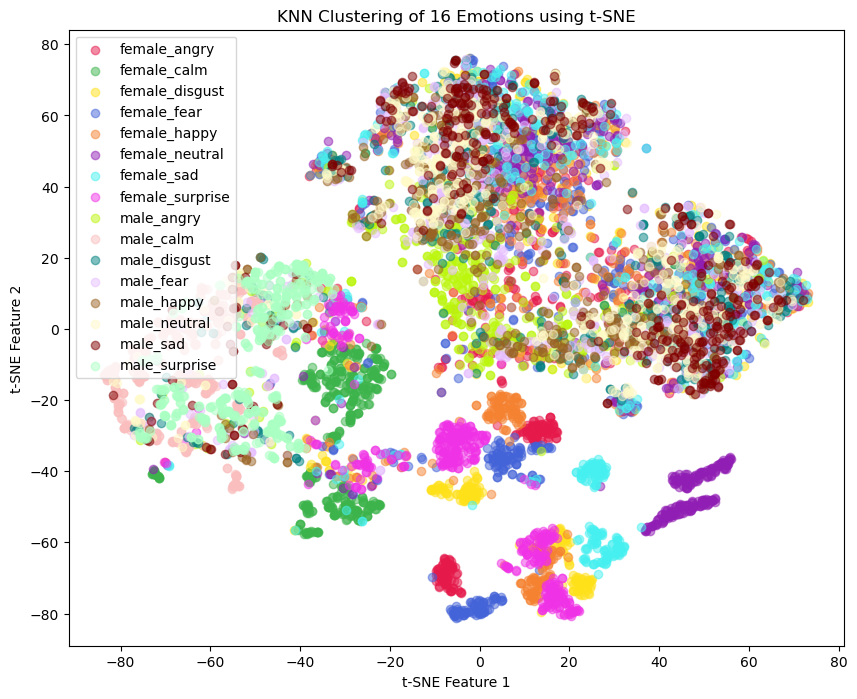

In [196]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

distinct_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', 
    '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
    '#800000', '#aaffc3'
]

# Apply t-SNE to the test set to reduce dimensions to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_merged)

# Visualize the results
plt.figure(figsize=(10, 8))
# Generating a color spectrum based on the number of unique labels
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(y_pred_merged_m))))
for i, color in zip(np.unique(y_pred_merged_m), distinct_colors):
    # Use `class_labels[i]` to fetch the appropriate label from the list
    plt.scatter(X_test_tsne[y_pred_merged_m == i, 0], X_test_tsne[y_pred_merged_m == i, 1], color=color, alpha=0.5, label=class_labels[i])

plt.title('KNN Clustering of 16 Emotions using t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

In [198]:
import plotly.graph_objects as go
import numpy as np

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

distinct_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', 
    '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
    '#800000', '#aaffc3'
]

# Apply t-SNE to the test set to reduce dimensions to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_merged)

# Convert class labels from numeric to string for hover info
labels_str = np.array(class_labels)[y_pred_merged_m.astype(int)]

fig = go.Figure()

# Add traces for each unique label in 'y_pred_merged_m'
for i, color in zip(np.unique(y_pred_merged_m), distinct_colors):
    # Filter data points by current label 'i'
    tsne_filtered = X_test_tsne[y_pred_merged_m == i, :]
    hover_text = labels_str[y_pred_merged_m == i]
    
    fig.add_trace(go.Scatter(x=tsne_filtered[:, 0], y=tsne_filtered[:, 1],
                             mode='markers',
                             marker=dict(color=color),
                             name=class_labels[i],
                             text=hover_text,
                             hoverinfo='text'))

# Update layout for better visualization
fig.update_layout(title='KNN Clustering of 6 out of 16 Emotions using t-SNE',
                  xaxis_title='t-SNE Feature 1',
                  yaxis_title='t-SNE Feature 2',
                  legend_title='Emotions',
                  legend=dict(yanchor="top", y=1, xanchor="left", x=1.05))

fig.show()

In [158]:
#load clean non aug dataset
final_df = pd.read_csv("C:\\Users\\cosl5\\Downloads\\final_df.csv")
# drop first column
final_df.drop('Unnamed: 0', axis='columns', inplace=True)
final_df.head()

,Emotions_with_gender,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5,Emotions_without_gender
0,13,Ravdess\03-01-01-01-01-01-01.wav,-697.79260,54.890040,0.663466,12.435786,7.733952,0.530750,-3.216631,-3.159394,...,0.000005,0.000004,3.206722e-07,-0.049044,0.020024,-0.018065,-0.064224,0.014611,0.006371,5
1,5,Ravdess\03-01-01-01-01-01-02.wav,-650.71090,54.477303,-9.090127,8.411754,-4.387536,-3.765706,-5.362752,-8.610381,...,0.000006,0.000004,3.992178e-07,-0.019344,0.012139,0.013491,-0.040532,0.006054,0.002813,5
2,13,Ravdess\03-01-01-01-01-01-03.wav,-614.73914,56.708190,-2.685535,10.650176,4.240806,-2.472097,-12.035720,-6.654510,...,0.000071,0.000045,4.472179e-06,-0.013746,-0.006525,0.013147,-0.001333,0.005258,-0.001753,5
3,5,Ravdess\03-01-01-01-01-01-04.wav,-695.85030,42.934265,-7.274557,8.977729,-4.170579,-4.924890,-6.537960,-12.679187,...,0.000013,0.000006,6.443871e-07,-0.006601,0.012613,-0.023542,0.016175,-0.010311,0.000834,5
4,13,Ravdess\03-01-01-01-01-01-05.wav,-713.43350,68.360940,7.989171,15.139791,11.715775,0.430983,1.002558,-2.773119,...,0.000002,0.000001,7.229193e-08,-0.023409,0.016632,-0.042659,0.019653,0.014472,0.010889,5


In [159]:
# Train-test split dataset for clean dataset
final_df_testing = final_df.copy()
X_clean = final_df_testing.drop(columns=['Path', 'Emotions_without_gender','Emotions_with_gender'], axis=1)
y_clean = final_df_testing['Emotions_with_gender']

# Handle imbalance classes with SMOTE for clean dataset
smote = SMOTE(random_state=42)
X_smote_clean, y_smote_clean = smote.fit_resample(X_clean, y_clean)
# Split your data into training and testing sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_smote_clean, y_smote_clean, test_size=0.2, random_state=42)

# Feature scaling for clean dataset
scaler = StandardScaler()
X_train_clean = scaler.fit_transform(X_train_clean)
X_test_clean = scaler.transform(X_test_clean)


In [160]:
# Find best n-neighbors for kNN (15 cv and manhattan)
k_values = range(1,10, 1)
cv_scores = []

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    
    # Perform 15-fold cross-validation
    scores = cross_val_score(classifier, X_train_clean, y_train_clean, cv=15, scoring='accuracy')
    
    # Store the mean score
    cv_scores.append(scores.mean())

best_k_clean = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

print(f'Optimal k: {best_k_clean} with Cross-Validation Accuracy: {best_score:.4f}')

Optimal k: 1 with Cross-Validation Accuracy: 0.7408


In [213]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

k_values = range(1, 10)
cv_scores = []

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    # Perform 10-fold cross-validation
    scores = cross_val_score(classifier, X_train_clean, y_train_clean, cv=15, scoring='accuracy')
    # Store the mean score
    cv_scores.append(scores.mean())

# Find the optimal k
best_k_clean = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

print(f'Optimal k: {best_k_clean} with Cross-Validation Accuracy: {best_score:.4f}')

# To get training accuracy for the optimal k, retrain the model and evaluate it on the training set
classifier_optimal = KNeighborsClassifier(n_neighbors=best_k_clean, metric='manhattan')
classifier_optimal.fit(X_train_clean, y_train_clean)
training_accuracy = classifier_optimal.score(X_train_clean, y_train_clean)

print(f'Training Accuracy for Optimal k: {training_accuracy:.4f}')

Optimal k: 1 with Cross-Validation Accuracy: 0.7408
Training Accuracy for Optimal k: 0.9998


In [161]:
# Train KNN model using best n-neighbors found
classifier_clean = KNeighborsClassifier(n_neighbors=best_k_clean, metric='manhattan')
classifier_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = classifier_clean.predict(X_test_clean)

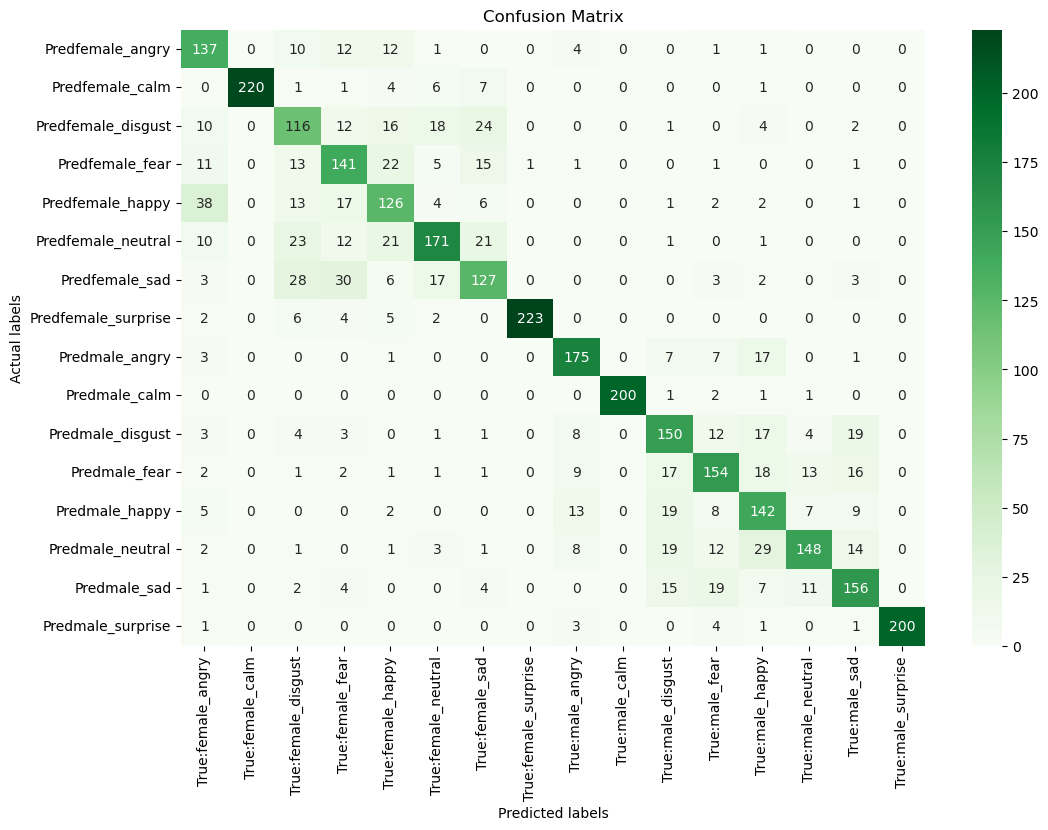

In [165]:
confusion_matrix_clean = confusion_matrix(y_test_clean, y_pred_clean)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

# Create a pandas DataFrame as you did, which is optional but useful for labeling.
confusion_non_aug_clean_df = pd.DataFrame(confusion_matrix_clean.T, 
                            index=['Pred' + str(label) for label in class_labels], 
                            columns=['True:' + str(label) for label in class_labels])

# Use Seaborn to create a heatmap from the DataFrame
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(confusion_non_aug_clean_df, annot=True, fmt='d', cmap='Greens')

plt.title('Confusion Matrix')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [166]:
f1_clean_features = f1_score(y_test_clean, y_pred_clean, average='weighted')
print(f'F1 Score: {f1_clean_features:.4f}')

F1 Score: 0.7343


In [167]:
f1_clean_features = f1_score(y_test_clean, y_pred_clean, average=None)
print(f'F1 Score: {f1_clean_features}')

F1 Score: [0.67487685 0.95652174 0.55106888 0.62806236 0.59016393 0.6993865
 0.59624413 0.95708155 0.81018519 0.98765432 0.66225166 0.66956522
 0.63392857 0.7014218  0.70588235 0.97560976]


In [225]:
# evaluate the model
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print(f'Accuracy: {accuracy_clean}')

Accuracy: 0.7371721778791334


In [224]:
#recall based on manhattan distance
from sklearn.metrics import recall_score

recall_clean_features_m = recall_score(y_test_clean, y_pred_clean, average= 'weighted')
print(f"\nRecall:\n{recall_clean_features_m}")


Recall:
0.7371721778791334


In [169]:
#precision based on manhattan distance
precision_clean = precision_score(y_test_clean, y_pred_clean, average=None)
print(f"\nPrecision:\n{precision_clean}")


Precision:
[0.76966292 0.91666667 0.57142857 0.66824645 0.6        0.65769231
 0.57990868 0.9214876  0.82938389 0.97560976 0.67567568 0.65531915
 0.69268293 0.62184874 0.71232877 0.95238095]


In [183]:
#report based on manhattan distance
report_clean = classification_report(y_test_clean, y_pred_clean)
print(f"\nReport:\n{report_clean}")


Report:
              precision    recall  f1-score   support

           0       0.77      0.60      0.67       228
           1       0.92      1.00      0.96       220
           2       0.57      0.53      0.55       218
           3       0.67      0.59      0.63       238
           4       0.60      0.58      0.59       217
           5       0.66      0.75      0.70       229
           6       0.58      0.61      0.60       207
           7       0.92      1.00      0.96       224
           8       0.83      0.79      0.81       221
           9       0.98      1.00      0.99       200
          10       0.68      0.65      0.66       231
          11       0.66      0.68      0.67       225
          12       0.69      0.58      0.63       243
          13       0.62      0.80      0.70       184
          14       0.71      0.70      0.71       223
          15       0.95      1.00      0.98       200

    accuracy                           0.74      3508
   macro avg     

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and labels

# First split: Separate out the test set (20% of the dataset)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_smote_clean, y_smote_clean, test_size=0.2, random_state=42)

# Second split: Split the remaining data into training and validation sets
# Since you want 80% of the original training data to be the new training set,
# and 20% for validation, you calculate the percentage of the remaining data to allocate.
# Since 80% data was allocated to train_val, we take 80% of that for training, which is 0.8 * 0.8 = 0.64 for training.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
# Note: We use test_size=0.25 here because 0.25 is 20% of the remaining 80% (i.e., 1/4th).

# Initialize and train your KNN classifier
knn = KNeighborsClassifier(n_neighbors=1, metric = "manhattan")
knn.fit(X_train, y_train)

# Calculate training accuracy
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate validation accuracy
y_val_pred = knn.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Calculate test accuracy
y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Conceptual validation loss (inverse of accuracy for simplicity)
val_loss = 1 - val_accuracy

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9999049520007603
Validation Accuracy: 0.7074422583404619
Test Accuracy: 0.6995438996579247


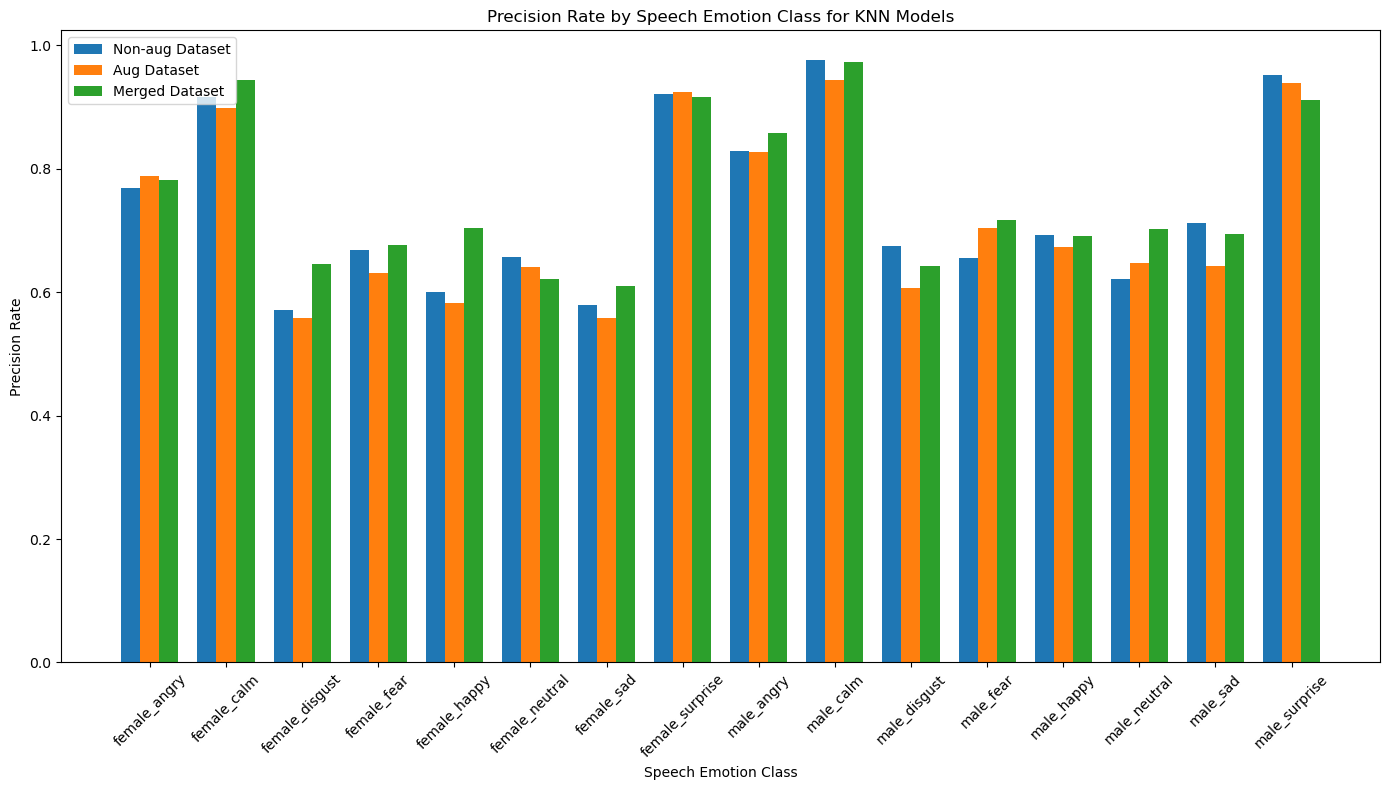

In [184]:
#Plotting precision graph for each emotions (comparing merged with aug data)
class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

n_classes = len(class_labels)
x = np.arange(n_classes)  # the label locations

# Width of the bars
width = 0.25

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width, precision_clean, width, label='Non-aug Dataset')
bars2 = ax.bar(x, precision_aug_features_m, width, label='Aug Dataset')
bars3 = ax.bar(x + width, precision_merged_features_m, width, label='Merged Dataset')

'''
# Function to add labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 10),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function for each set of bars
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
'''

ax.set_xlabel('Speech Emotion Class')
ax.set_ylabel('Precision Rate')
ax.set_title('Precision Rate by Speech Emotion Class for KNN Models')
ax.set_xticks(x)
ax.set_xticklabels(class_labels, rotation=45)
ax.legend()

fig.tight_layout()

plt.show()

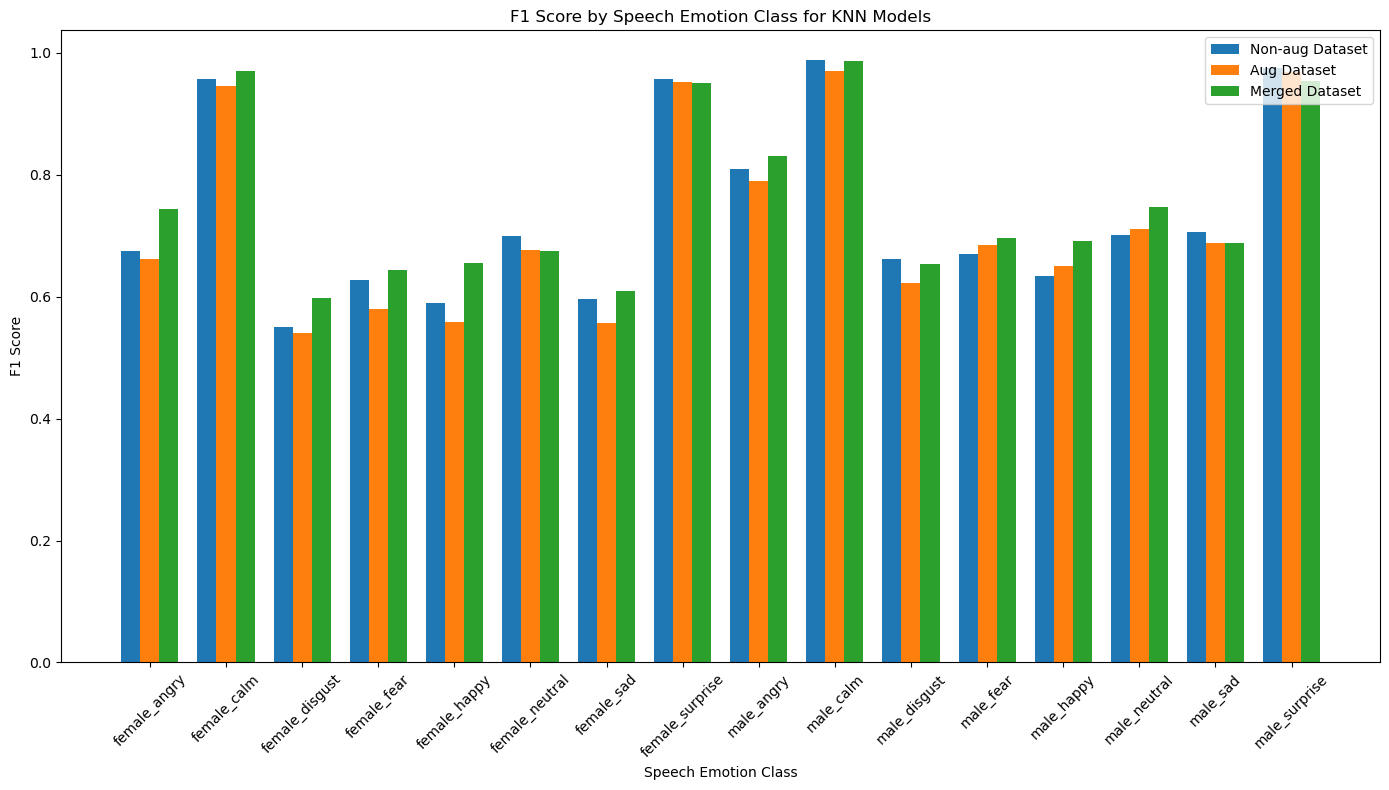

In [187]:
#Plotting f1-score graph for each emotions (comparing merged with aug data)
class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

n_classes = len(class_labels)
x = np.arange(n_classes)  # the label locations

# Width of the bars
width = 0.25

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width, f1_clean_features, width, label='Non-aug Dataset')
bars2 = ax.bar(x, f1_aug_features_m, width, label='Aug Dataset')
bars3= ax.bar(x + width, f1_merged_features_m, width, label='Merged Dataset')

'''
# Function to add labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 10),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function for each set of bars
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
'''

ax.set_xlabel('Speech Emotion Class')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score by Speech Emotion Class for KNN Models')
ax.set_xticks(x)
ax.set_xticklabels(class_labels, rotation=45)
ax.legend()

fig.tight_layout()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b28ef1e-f6a6-4523-8903-70adcffed1c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>